#  Understanding User Engagement During Live Concerts
##### Rhiann Zhang - Senior Data Analyst - Test Project/Assessment

<br />

### Brief Summary of Findings
1. **More Talking, Less Timing**: From the investigative analysis performed below, we can see that chat messaging is the user activity most correlated with overall engagement while other metrics such as concert duration and viewing time were not significantly related to engagement. 
>Instead of focusing on extending concert lengths to keep viewers watching as long as possible,  pointing efforts towards integrating features that encourage users to chat, such as interactive prompts/conversation starters or advising artists to ask the audience questions would be more effective in boosting overall user engagement. Gamified chat-based features such as leaderboards, shoutouts, or badges would also cultivate a more exciting user experience.

2. **It Pays to be Popular**: While one might assume that having a larger audience could dilute excitement, the quality of users actually increases proportionally with an artist's follower count. The pop genre is also leading in engagement overall likely due to the size of their fanbases. 
>This information can help streaming platforms better curate their future events by driving strategy when selecting artists, promoting concerts, and planning the content of the shows. The platform can lean into fan loyalty and excitement by focusing on securing popular artists and developing interactive show segments that appeal directly to dedicated fans (such as artist Q&As, personal messages, or BTS footage) to help maintain high engagement levels and increase a sense of involvement and connection to the event. When collaborating with particularly high follower performers, platform landing pages could also be specially adjusted to inform and push viewers towards the musician’s event. Cross-platform social media campaigns and influencer collaboration should be especially highlighted when considering the pop genre, as audiences are likely younger and are particularly receptive to this type of marketing compared to other genres where fan interaction might be more passive or less dependent on viral social media trends.

3. **Coming and Going**: Every concert follows the same rough pattern of viewers joining and leaving. Viewers trickle in for the first 20% of the concert. Then there is an uninterrupted period where there are no users at all either joining or leaving. About half of the viewers leave throughout the last 20% of the show before the show is completely done, with the other half staying until the very end and leaving at the last minute.
>Platforms can focus on ensuring a streamlined log-in experiences for users and advise artists to create high energy and captivating introductions to minimize late arrivals and capture audience attention. Prioritizing surprise and excitement during the last 20% or creating a special moment at the conclusion of the event can also incentivize viewers to stick around and stay engaged to the very end.

<br />

#### Future Data to Capture: 
1. In the future, I would recommend that the time of user activity is also captured. Knowing when users send chat messages or emojis can provide insight as to what part of a concert drives the most interaction and help tailor future events. Particularly high engagement moments can also be clipped and used as promotion in advertisements and social media. Understanding when low engagement moments occur can also tell us what to avoid in future events.
2. Gathering user device type data could also reveal significant user trends. For example, using a smart TV or laptop may decrease a user's likelihood to engage in comparison to other platforms like mobile devices where messages and emojis might be easier to send. 

<br />


##### Data Processing, Code, and Investigative Analysis are documented below. 

<br />

### Data Loading and Cleaning

In [1]:
# install modules to be used
%pip install seaborn
%pip install missingno

In [4]:
# Load all necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [5]:
# Read in the csv file 
df = pd.read_csv("concert_viewership.csv", low_memory=False)
df # preview data 

,concert_id,user_id,viewing_start_time,viewing_end_time,num_chat_messages,num_emojis_used,num_upvotes_received,total_viewing_time,concert_genre,concert_start_time,concert_end_time,artist_popularity,concert_duration
0,1.0,43137.0,2023-01-01 00:16:26,2023-01-01 02:10:40,18.0,6.0,6.0,6853.426549,classical,2023-01-01 00:00:00,2023-01-01 02:13:00,4501015.0,7980.0
1,1.0,26753.0,2023-01-01 00:15:26,2023-01-01 02:13:00,0.0,NaN,3.0,7054.135226,classical,2023-01-01 00:00:00,2023-01-01 02:13:00,4501015.0,7980.0
2,1.0,23606.0,2023-01-01 00:19:37,2023-01-01 02:13:00,0.0,NaN,4.0,6802.533042,classical,2023-01-01 00:00:00,2023-01-01 02:13:00,4501015.0,7980.0
3,1.0,6022.0,2023-01-01 00:03:41,2023-01-01 02:12:40,13.0,4.0,0.0,7739.523533,classical,2023-01-01 00:00:00,2023-01-01 02:13:00,4501015.0,7980.0
4,1.0,20007.0,2023-01-01 00:02:38,2023-01-01 02:04:03,29.0,6.0,4.0,7285.696676,classical,2023-01-01 00:00:00,2023-01-01 02:13:00,4501015.0,7980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


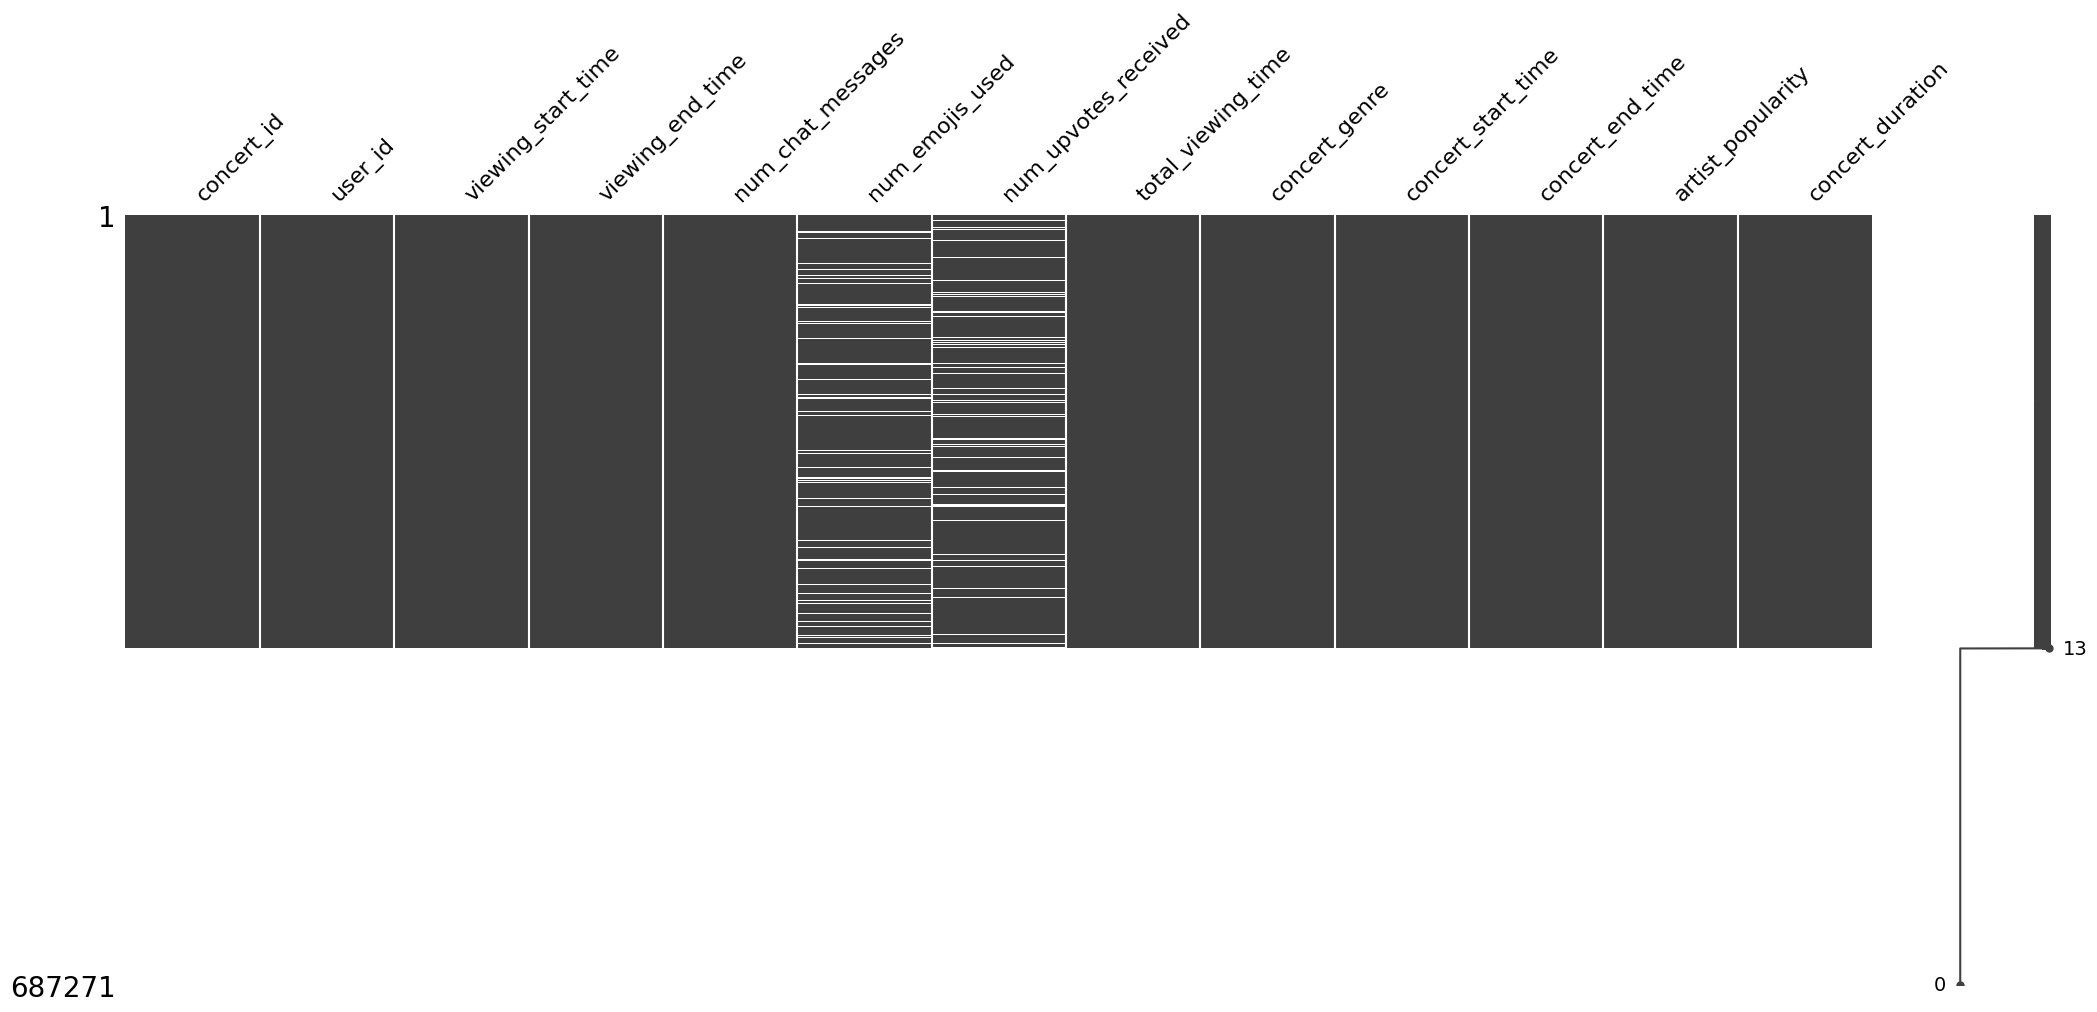

In [6]:
# ISSUE: there are many null values within the dataset 
# Visualize null values within dataset 
msno.matrix(df);

In [7]:
# Drop rows where all values are NaN
df.dropna(how='all', inplace=True)

# view number of remaining null values in each column
print('Before:\n')
print(df.isna().sum()) # about 12% of entries are null in num_emojis_used and num_upvotes_received
df = df.fillna(0) # assume nulls for these 2 fields mean no emojis or upvotes were used/received and fill with 0 

print('\n\nAfter:\n')
df.isna().sum()

Before:

concert_id                  0
user_id                     0
viewing_start_time          0
viewing_end_time            0
num_chat_messages           0
num_emojis_used         38665
num_upvotes_received    38807
total_viewing_time          0
concert_genre               0
concert_start_time          0
concert_end_time            0
artist_popularity           0
concert_duration            0
dtype: int64


After:



concert_id              0
user_id                 0
viewing_start_time      0
viewing_end_time        0
num_chat_messages       0
num_emojis_used         0
num_upvotes_received    0
total_viewing_time      0
concert_genre           0
concert_start_time      0
concert_end_time        0
artist_popularity       0
concert_duration        0
dtype: int64

In [8]:
### ISSUE:: There are about 34k instances where the number of chat messages and emojis sent were both 0 but the number of 
### upvotes received on said messages/emojies was more than 0. 
# Normally I would investigate the root definition of the num_upvotes_received field, determine whether or not this 
# situation is possible, and would try to pinpoint root cause of this issue. Since  About 9% of rows have this issue. 
# For the purposes of this assessment, I will assume this subset of user data is faulty, drop them from the table for now,
# and continue on with the analysis. 
df = df.drop(df[(df["num_upvotes_received"] > 0) & (df["num_chat_messages"] == 0) & (df["num_emojis_used"] == 0)].index)

In [9]:
# ISSUE:: It seems unlikely that all concerts held started exactly at midnight. 
# Normally, I would flag this issue and investigate whether or not the values were accidentally rounded to the date 
# level during the ETL process. For the purposes of this assessment, I will assume this subset of data happens to 
# only contains concerts that began at 12:00 am. 
df['concert_start_time'].value_counts().reset_index().sort_values(by='concert_start_time')

,concert_start_time,count
2,2023-01-01 00:00:00,38082
10,2023-01-02 00:00:00,18084
8,2023-01-03 00:00:00,25601
7,2023-01-04 00:00:00,25843
9,2023-01-05 00:00:00,25478
13,2023-01-06 00:00:00,1240
5,2023-01-07 00:00:00,30232
0,2023-01-08 00:00:00,39248
3,2023-01-10 00:00:00,33137
6,2023-01-11 00:00:00,29253


In [10]:
# check df datatypes 
print('Before:\n')
print(df.dtypes)

# convert columns to appropriate datatypes 
df = df.astype({'concert_id': int, 'user_id': int})
df['viewing_start_time'] = pd.to_datetime(df['viewing_start_time'])
df['viewing_end_time'] = pd.to_datetime(df['viewing_end_time'])
df['concert_start_time'] = pd.to_datetime(df['concert_start_time'])
df['concert_end_time'] = pd.to_datetime(df['concert_end_time'])

print('\n\nAfter:\n')
df.dtypes

Before:

concert_id              float64
user_id                 float64
viewing_start_time       object
viewing_end_time         object
num_chat_messages       float64
num_emojis_used         float64
num_upvotes_received    float64
total_viewing_time      float64
concert_genre            object
concert_start_time       object
concert_end_time         object
artist_popularity       float64
concert_duration        float64
dtype: object


After:



concert_id                       int32
user_id                          int32
viewing_start_time      datetime64[ns]
viewing_end_time        datetime64[ns]
num_chat_messages              float64
num_emojis_used                float64
num_upvotes_received           float64
total_viewing_time             float64
concert_genre                   object
concert_start_time      datetime64[ns]
concert_end_time        datetime64[ns]
artist_popularity              float64
concert_duration               float64
dtype: object

In [11]:
# confirm that df is unique on a concert_id and user_id level 
dftest = df.copy()
dftest['composite'] = dftest['concert_id'].astype(str) + '-' + dftest['user_id'].astype(str)
dftest[dftest['composite'].duplicated(keep=False)].sort_values(by='composite')

,concert_id,user_id,viewing_start_time,viewing_end_time,num_chat_messages,num_emojis_used,num_upvotes_received,total_viewing_time,concert_genre,concert_start_time,concert_end_time,artist_popularity,concert_duration,composite


In [12]:
# recreate duration fields to ensure accuracy of numbers and account for slight discrepancies in rounding and 
df['total_viewing_time'] = (df['viewing_end_time'] - df['viewing_start_time']).dt.total_seconds().astype(int)
df['concert_duration'] = (df['concert_end_time'] - df['concert_start_time']).dt.total_seconds().astype(int) 

<br />
<br />


## Creating New Fields

In the following code block, I have created the new feature that represents the ratio of the total viewing time to the total concert duration for each user and named it as **viewing_duration_ratio**.


Additionally, I have also created the **engagements_per_hours_viewed** feature. I believe this will by useful for predicting user engagement since it measures overall user engagement and normalizes it by the time a viewer spent watching an event. Viewers with a longer watch time that did not interact much will have a lower value in this field. Viewers with a shorter watch time that were very active with have a higher score in this field. This will quantify the overall engagement rate of a user while also taking into accounting for their viewing time. 


In [13]:
# Create a new feature that represents the ratio of the total viewing time to the total concert duration for each user
df['viewing_duration_ratio'] = (df['total_viewing_time'] / df['concert_duration'])


# Create a new feature that will be useful for predicting user engagement 
df['total_engagements_sent'] = df['num_chat_messages'] +  df['num_emojis_used'] + df['num_upvotes_received']
df['engagements_per_hours_viewed'] = (df['total_engagements_sent']) / (df['total_viewing_time'] / 60 / 60)

In [15]:
### additional fields created for further investigation ###

# Create time joined / left relative to concert start times to include within correlation matrix 
df['seconds_passed_at_join'] = (df['viewing_start_time'] - df['concert_start_time']).dt.total_seconds().astype(int)
df['seconds_remaining_at_leave'] = (df['concert_end_time'] - df['viewing_end_time']).dt.total_seconds().astype(int)


# Create feature to investgiate historical engagemnet rates on a user level 
def cumsum_preceding(df, id_col, date_col, value_col):
    df = df.sort_values([id_col, date_col])
    df['cumsum_preceding'] = df.groupby(id_col)[value_col].shift(1).cumsum()
    df['cumsum_preceding'].fillna(0, inplace=True)
    return df

df = cumsum_preceding(df, 'user_id', 'concert_start_time', 'total_engagements_sent')
df = df.rename(columns={'cumsum_preceding': 'total_prev_engagements'})
df = cumsum_preceding(df, 'user_id', 'concert_start_time', 'total_viewing_time')
df = df.rename(columns={'cumsum_preceding': 'total_prev_viewing_time'})
df['prev_engagements_per_hours_viewed']= (df['total_prev_engagements']) / (df['total_prev_viewing_time'] / 60 / 60)
df

,concert_id,user_id,viewing_start_time,viewing_end_time,num_chat_messages,num_emojis_used,num_upvotes_received,total_viewing_time,concert_genre,concert_start_time,concert_end_time,artist_popularity,concert_duration,viewing_duration_ratio,total_engagements_sent,engagements_per_hours_viewed,seconds_passed_at_join,seconds_remaining_at_leave,total_prev_engagements,total_prev_viewing_time,prev_engagements_per_hours_viewed
32777,1,1,2023-01-01 00:00:53,2023-01-01 02:02:35,24.0,6.0,2.0,7302,classical,2023-01-01,2023-01-01 02:13:00,4501015.0,7980,0.915038,32.0,15.776500,53,625,0.0,0.000000e+00,NaN
106910,4,1,2023-01-04 00:06:37,2023-01-04 02:11:24,6.0,4.0,3.0,7487,pop,2023-01-04,2023-01-04 02:20:00,2250467.0,8400,0.891310,13.0,6.250835,397,516,32.0,7.302000e+03,15.776500
222267,8,1,2023-01-08 00:22:48,2023-01-08 02:05:00,6.0,2.0,0.0,6132,pop,2023-01-08,2023-01-08 02:05:00,4931630.0,7500,0.817600,8.0,4.696673,1368,0,45.0,1.478900e+04,10.954087
247429,10,1,2023-01-10 00:02:05,2023-01-10 02:35:27,17.0,5.0,0.0,9202,country,2023-01-10,2023-01-10 02:47:00,3317312.0,10020,0.918363,22.0,8.606825,125,693,53.0,2.092100e+04,9.120023
308502,12,1,2023-01-12 00:21:15,2023-01-12 02:18:00,16.0,5.0,4.0,7005,classical,2023-01-12,2023-01-12 02:18:00,4736681.0,8280,0.846014,25.0,12.847966,1275,0,75.0,3.012300e+04,8.963251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219884,8,49999,2023-01-08 00:18:26,2023-01-08 02:05:00,13.0,5.0,1.0,6394,pop,2023-01-08,2023-01-08 02:05:00,4931630.0,7500,0.852533,19.0,10.697529,1106,0,6513059.0,2.238763e+09,10.473199
256136,10,49999,2023-01-10 00:26:21,2023-01-10 02:47:00,7.0,2.0,0.0,8439,country,2023-01-10,2023-01-10 02:47:00,3317312.0,10020,0.842216,9.0,3.839317,1581,0,6513078.0,2.238770e+09,10.473200
265098,11,49999,2023-01-11 00:01:27,2023-01-11 01:56:44,10.0,4.0,4.0,6917,classical,2023-01-11,2023-01-11 02:00:00,2702626.0,7200,0.960694,18.0,9.368223,87,196,6513087.0,2.238778e+09,10.473175
329228,12,49999,2023-01-12 00:17:18,2023-01-12 02:10:55,29.0,8.0,2.0,6817,classical,2023-01-12,2023-01-12 02:18:00,4736681.0,8280,0.823309,39.0,20.595570,1038,425,6513105.0,2.238785e+09,10.473171


In [16]:
# view summary statistics of cleaned data along with new fields 
df.describe()

,concert_id,user_id,viewing_start_time,viewing_end_time,num_chat_messages,num_emojis_used,num_upvotes_received,total_viewing_time,concert_start_time,concert_end_time,artist_popularity,concert_duration,viewing_duration_ratio,total_engagements_sent,engagements_per_hours_viewed,seconds_passed_at_join,seconds_remaining_at_leave,total_prev_engagements,total_prev_viewing_time,prev_engagements_per_hours_viewed
count,351937.000000,351937.000000,351937,351937,351937.000000,351937.000000,351937.000000,351937.000000,351937,351937,3.519370e+05,351937.000000,351937.000000,351937.000000,351937.000000,351937.000000,351937.000000,3.519370e+05,3.519370e+05,301938.000000
mean,7.572284,24986.983113,2023-01-07 13:58:26.152331008,2023-01-07 16:02:54.262936064,13.722808,4.948136,2.651591,7468.110605,2023-01-07 13:44:05.358686464,2023-01-07 16:07:42.274498560,3.210795e+06,8616.915812,0.866675,21.322535,10.435254,860.793645,288.011562,2.794658e+06,9.604830e+08,10.472575
min,1.000000,1.000000,2023-01-01 00:00:00,2023-01-01 01:46:36,0.000000,0.000000,0.000000,5760.000000,2023-01-01 00:00:00,2023-01-01 02:13:00,3.755640e+05,7200.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,8.963251
25%,4.000000,12468.000000,2023-01-04 00:06:44,2023-01-04 02:11:17,7.000000,3.000000,1.000000,6652.000000,2023-01-04 00:00:00,2023-01-04 02:20:00,2.250467e+06,7740.000000,0.826774,14.000000,6.606515,424.000000,0.000000,8.188930e+05,2.817590e+08,10.467814
50%,8.000000,24983.000000,2023-01-08 00:07:14,2023-01-08 01:59:01,12.000000,5.000000,3.000000,7223.000000,2023-01-08 00:00:00,2023-01-08 02:05:00,3.047886e+06,8280.000000,0.858667,20.000000,9.523810,848.000000,3.000000,2.717606e+06,9.342735e+08,10.474887
75%,11.000000,37480.000000,2023-01-11 00:22:14,2023-01-11 02:00:00,18.000000,6.000000,4.000000,8314.000000,2023-01-11 00:00:00,2023-01-11 02:00:00,4.501015e+06,10020.000000,0.900000,27.000000,13.245033,1273.000000,500.000000,4.618962e+06,1.586682e+09,10.477440
max,15.000000,49999.000000,2023-01-15 00:33:48,2023-01-15 02:49:00,128.000000,18.000000,16.000000,10255.000000,2023-01-15 00:00:00,2023-01-15 02:49:00,4.931630e+06,10260.000000,0.999624,140.000000,76.027058,2052.000000,2040.000000,6.513144e+06,2.238792e+09,15.776500
std,4.198651,14439.474834,NaN,NaN,9.072200,2.280082,1.887879,1019.092866,NaN,NaN,1.206384e+06,1076.264474,0.047153,10.981953,5.548951,512.565057,411.088799,2.080863e+06,7.149622e+08,0.020974


<br />
<br />


## Investigating Correlations 

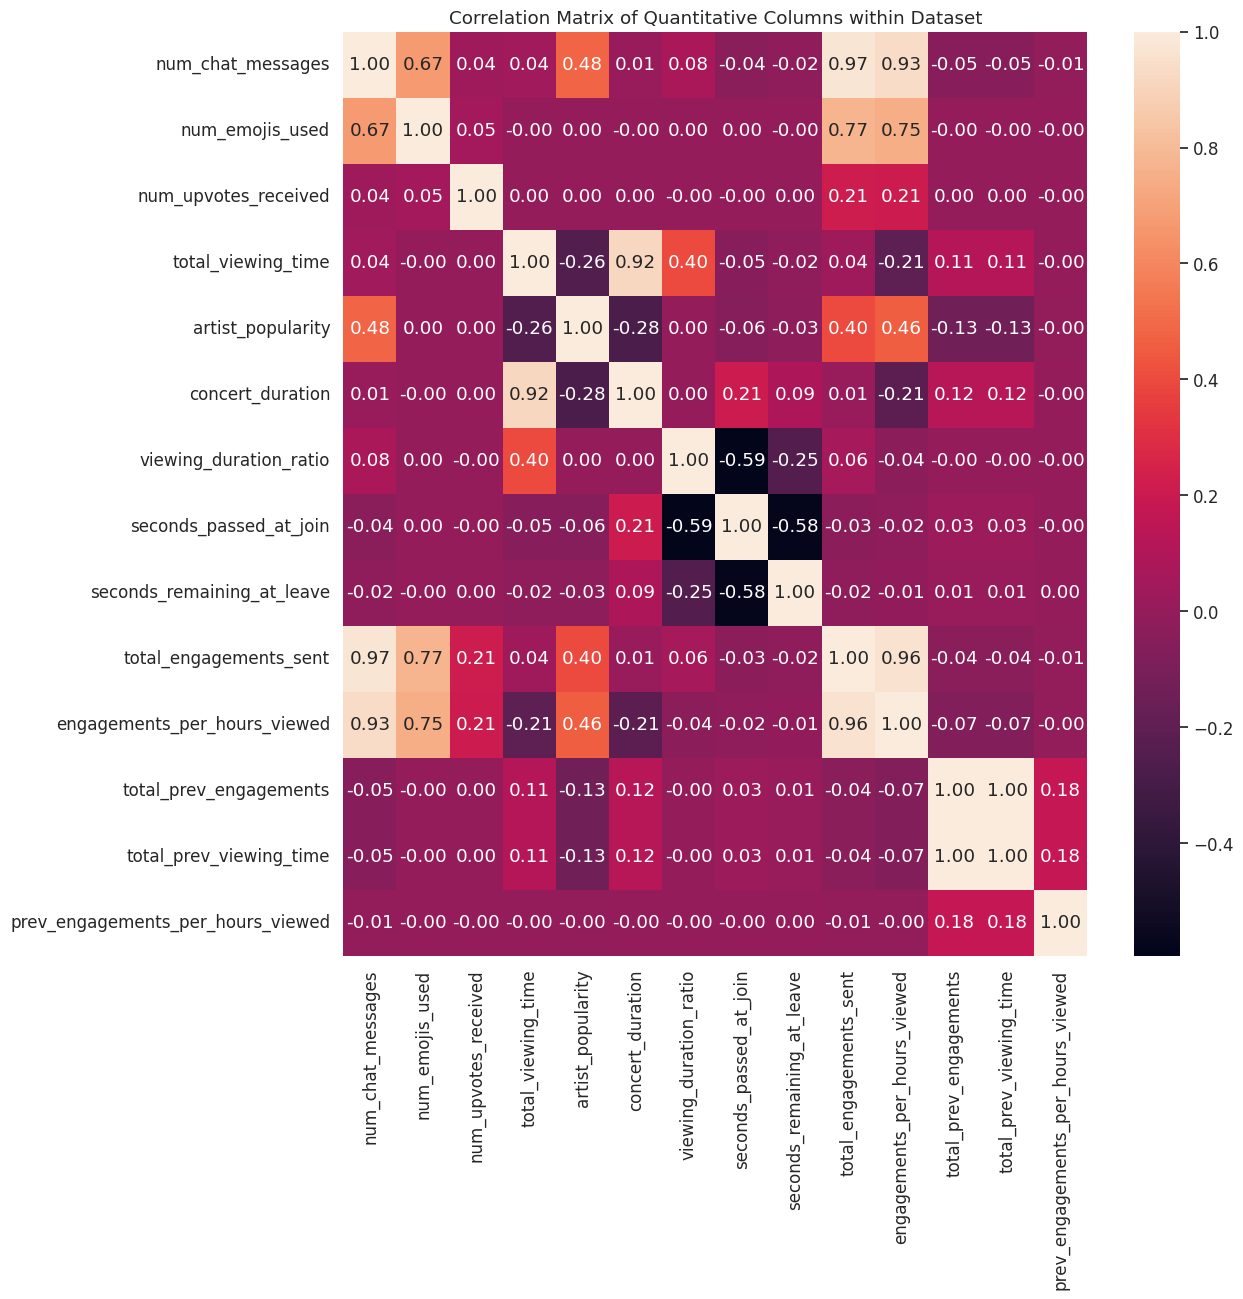

In [19]:
# investigate correlation between fields 
cordf = df[['num_chat_messages', 'num_emojis_used', 'num_upvotes_received', 'total_viewing_time', 
            'artist_popularity', 'concert_duration', 'viewing_duration_ratio',
           'seconds_passed_at_join','seconds_remaining_at_leave', 
           'total_engagements_sent', 'engagements_per_hours_viewed', 
           'total_prev_engagements', 'total_prev_viewing_time', 'prev_engagements_per_hours_viewed']]
fig, ax = plt.subplots(figsize=(12,12)) 
correlation_mat = cordf.corr()
sns.heatmap(correlation_mat, annot = True, ax=ax, fmt=".2f")
plt.title("Correlation Matrix of Quantitative Columns within Dataset")
plt.show()

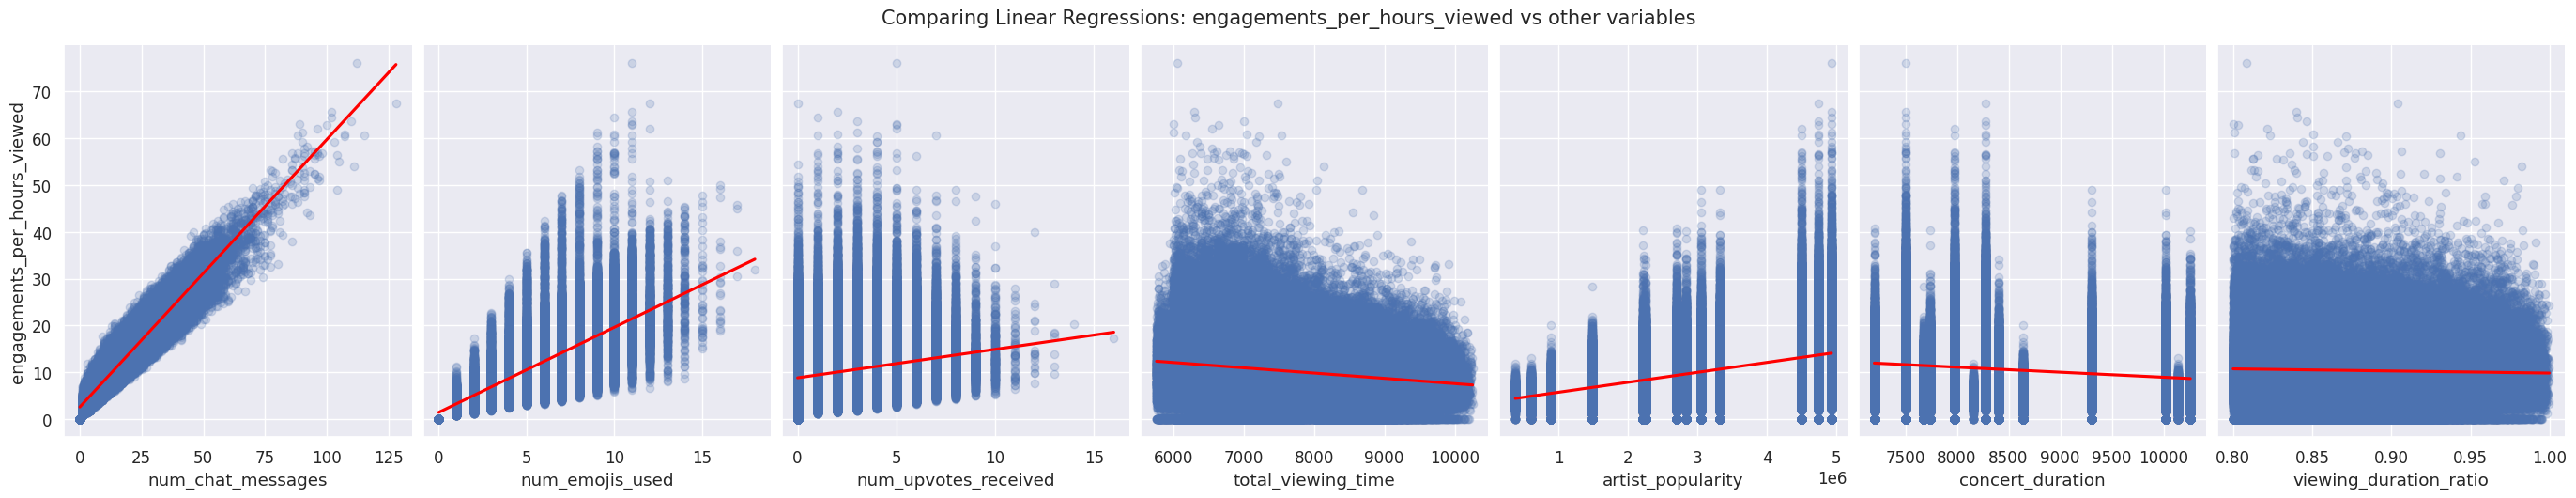

In [18]:
# Comparing Linear Regressions: engagements_per_hours_viewed vs other variables
sns.set(font_scale=1.1)
pp = sns.pairplot(df, x_vars=['num_chat_messages', 'num_emojis_used', 'num_upvotes_received', 'total_viewing_time', 
                               'artist_popularity', 'concert_duration', 'viewing_duration_ratio'], 
                      y_vars=["engagements_per_hours_viewed"],
                      height=5, aspect=.8, kind="reg",
                      plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}});
pp.fig.suptitle("Comparing Linear Regressions: engagements_per_hours_viewed vs other variables", 
                y=1.05, size=15);

**Interpretation**: From the correlation matrix and pairplots above, we can see that chat messages have the greatest correlation with overall engagement rate compared to other engagements types like the number of emojis that the user sent during the concert and the number of upvotes that a user’s messages and emojis received during the concert. Additionally, total_viewing time, concert_duration, and viewing_duration_ratio are not correlated with total engagements sent or engagement rate. Previous user engagement history also doesn’t seem to be related to a users engagement activity during their next concert. There is also some correlation between engagement and artist_popularity. 


<br />
<br />


## Investigating Concerts & Genres

In [20]:
concerts = df.groupby(['concert_genre', 'concert_id']).agg(
                    users=('user_id', 'count'),
                    engagements=('total_engagements_sent', 'sum'),
                    engagements_per_user=('total_engagements_sent', 'mean'), 
                    artist_followers=('artist_popularity', 'max'), 
                    duration=('concert_duration', 'max')
                ).sort_values(by=['artist_followers'],ascending=[False])
concerts

users  engagements  engagements_per_user  \
concert_genre concert_id                                             
pop           8           39248    1021597.0             26.029275   
classical     12          38706    1048365.0             27.085336   
              1           38082     973878.0             25.573184   
country       10          33137     802503.0             24.217732   
jazz          13          31484     687580.0             21.839029   
rock          7           30232     666608.0             22.049749   
classical     11          29253     512213.0             17.509760   
pop           4           25843     446431.0             17.274736   
rock          5           25478     487237.0             19.123832   
classical     3           25601     418750.0             16.356783   
              2           18084     246344.0             13.622207   
country       14          10048     119479.0             11.890824   
jazz          15           5501      61096.0             11.106344   
rock          6            1240      12108.0              9.764516   

                          artist_followers  duration  
concert_genre concert_id                              
pop           8                  4931630.0      7500  
classical     12                 4736681.0      8280  
              1                  4501015.0      7980  
country       10                 3317312.0     10020  
jazz          13                 3047886.0      9300  
rock          7                  2833983.0     10260  
classical     11                 2702626.0      7200  
pop           4                  2250467.0      8400  
rock          5                  2220731.0     10260  
classical     3                  2216104.0      7740  
              2                  1485405.0      7680  
country       14                  888633.0      8640  
jazz          15                  607745.0     10140  
rock          6                   375564.0      8160

**Interpretation**: While viewing the data on a concert level, we can see that artist following could be a good predictor of both the total number of concert attendees and overall engagement, with those metrics consistently increasing as the artist follower count increases. 

<br /><br /><br />

In [21]:
conc = concerts.reset_index()
genre = conc.groupby(['concert_genre']).agg(
                    concerts=('concert_id', 'count'),
                    users=('users', 'sum'),
                    avg_users_per_concert=('users', 'mean'),
                    total_engagements=('engagements', 'sum'),
                    avg_total_engagements_per_concert=('engagements', 'mean'), 
                    avg_artist_followers=('artist_followers', 'mean'), 
                    avg_duration=('duration', 'mean')
                ).sort_values(by=['avg_total_engagements_per_concert'],ascending=[False])
genre['avg_user_engagement'] = genre['total_engagements'] / genre['users']
genre

,concerts,users,avg_users_per_concert,total_engagements,avg_total_engagements_per_concert,avg_artist_followers,avg_duration,avg_user_engagement
concert_genre,,,,,,,,
pop,2,65091,32545.500000,1468028.0,734014.0,3.591048e+06,7950.0,22.553471
classical,5,149726,29945.200000,3199550.0,639910.0,3.128366e+06,7776.0,21.369368
country,2,43185,21592.500000,921982.0,460991.0,2.102972e+06,9330.0,21.349589
rock,3,56950,18983.333333,1165953.0,388651.0,1.810093e+06,9560.0,20.473275
jazz,2,36985,18492.500000,748676.0,374338.0,1.827816e+06,9720.0,20.242693


**Interpretation**: Pop performed the best in terms of total engagements per concert and average user engagement. Which follows from our previous findings, as the pop artists had the highest average follower counts and the highest number of users per concert. 

<br /><br /><br />

<br />
<br />


## Investigating Viewer Start and End Times 

In [22]:
# create df showing viewer start and ending counts by concert minutes 
time = df[['user_id', 'concert_id', 'concert_genre', 'viewing_start_time', 'viewing_end_time']]
time['view_start_rounded'] = time['viewing_start_time'].dt.strftime('%H:%M')
time['view_end_rounded'] = time['viewing_end_time'].dt.strftime('%H:%M')

timestart = time[['view_start_rounded','concert_id']].value_counts().reset_index().sort_values(by='view_start_rounded')
timeend = time[['view_end_rounded','concert_id']].value_counts().reset_index().sort_values(by='view_end_rounded')

timestart.columns = ['minutes', 'concert_id', 'viewer_starting_count']
timeend.columns = ['minutes', 'concert_id', 'viewer_ending_count']

minutes = timestart.merge(timeend, on = ['minutes', 'concert_id'], how = 'outer')
minutes

,minutes,concert_id,viewer_starting_count,viewer_ending_count
0,00:00,1,1384.0,NaN
1,00:00,2,761.0,NaN
2,00:00,3,1001.0,NaN
3,00:00,4,930.0,NaN
4,00:00,5,719.0,NaN
...,...,...,...,...
828,02:49,15,NaN,2739.0
829,02:50,5,NaN,747.0
830,02:50,7,NaN,886.0
831,02:51,5,NaN,12620.0


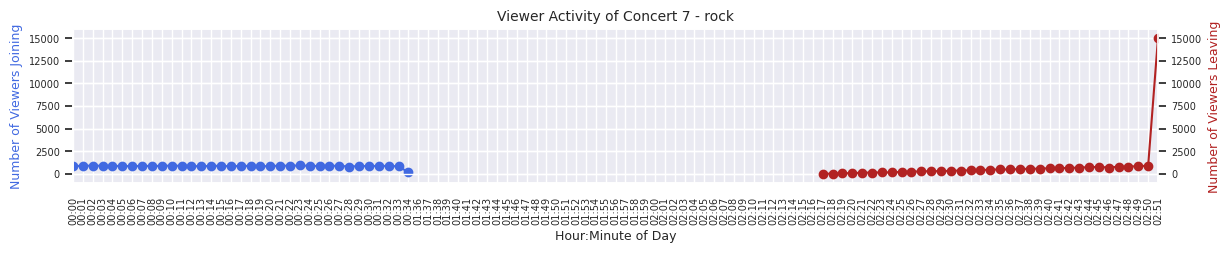

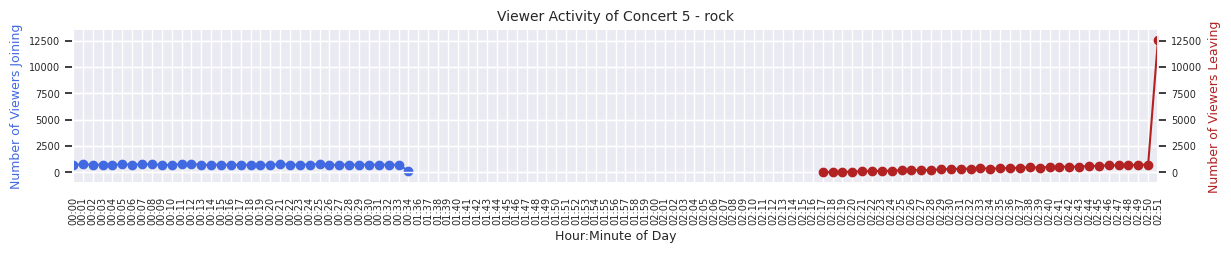

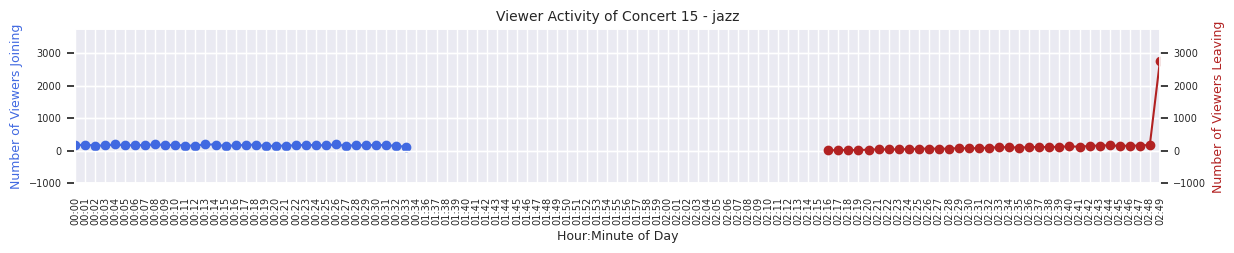

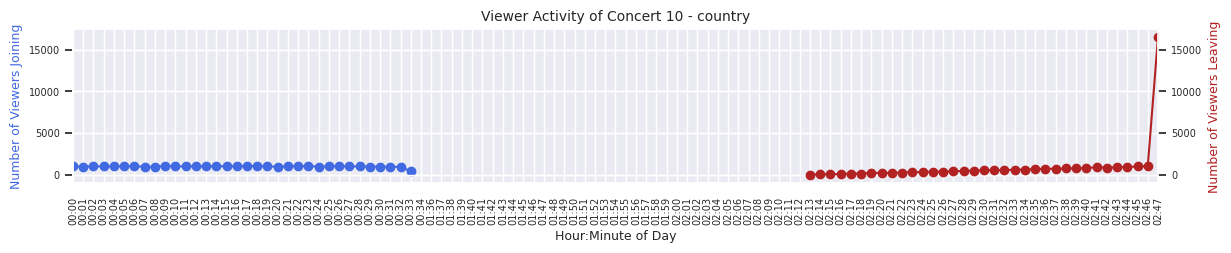

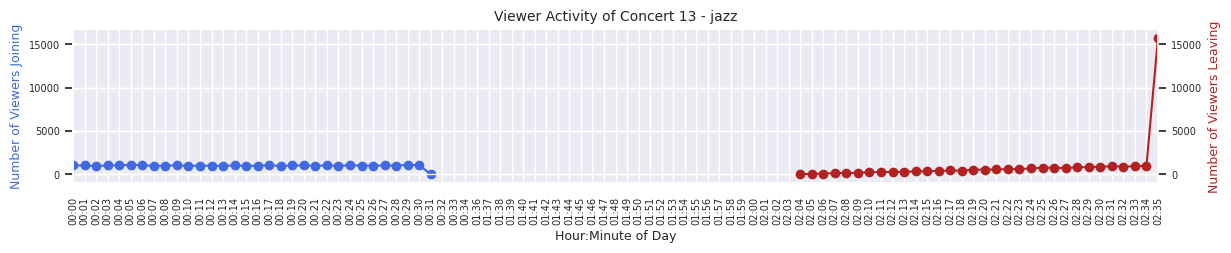

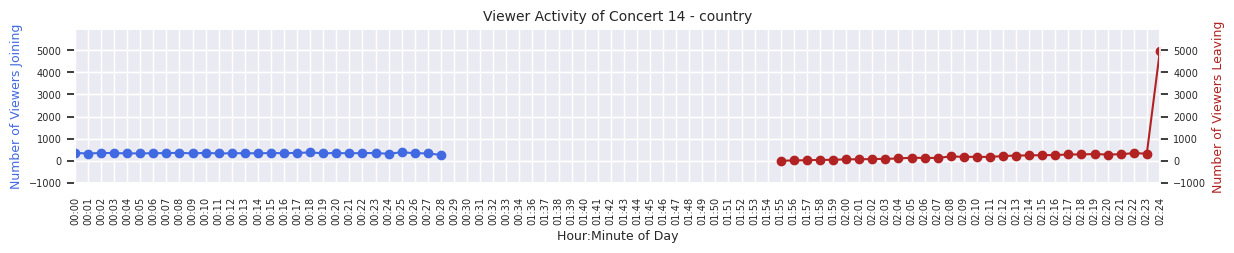

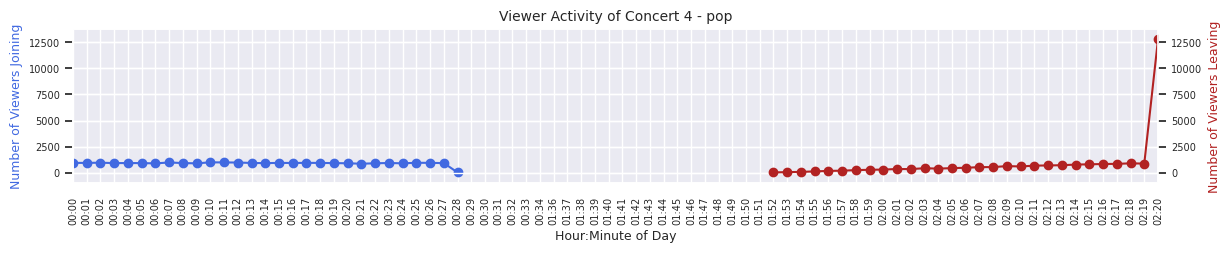

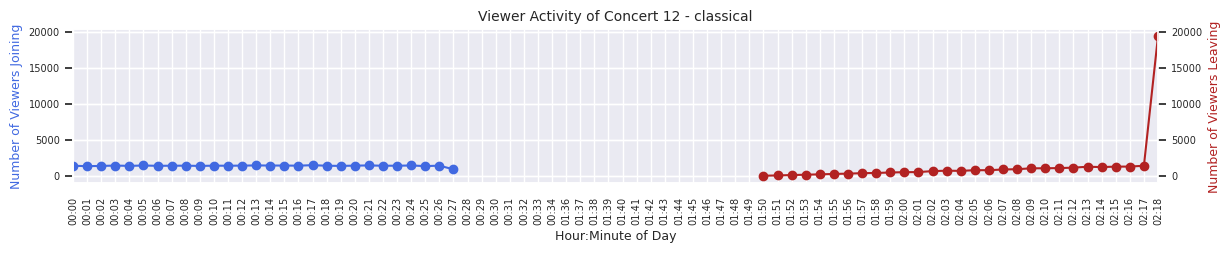

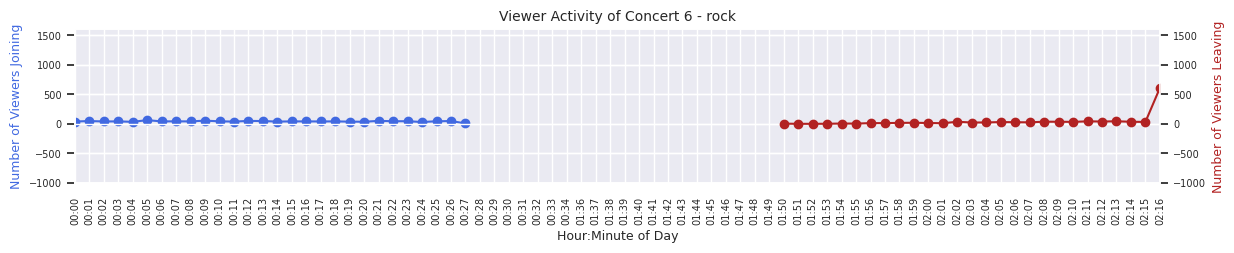

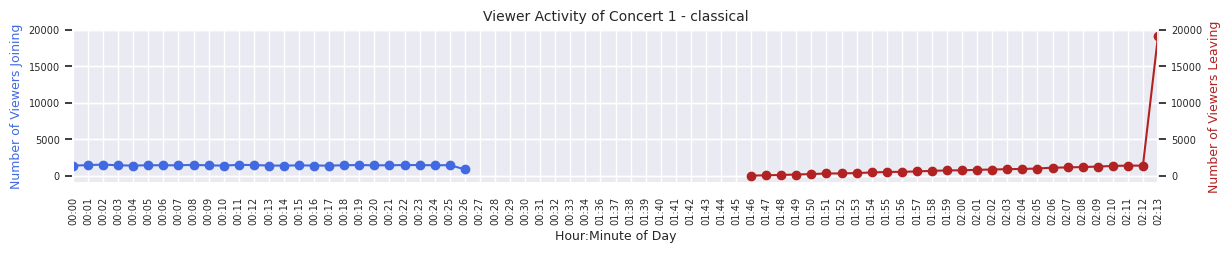

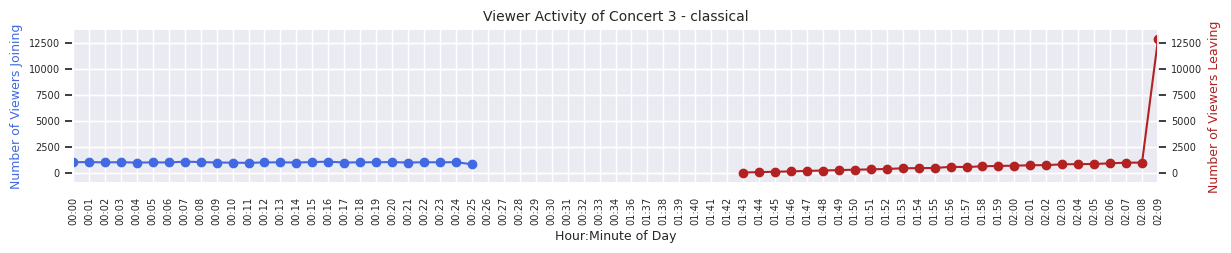

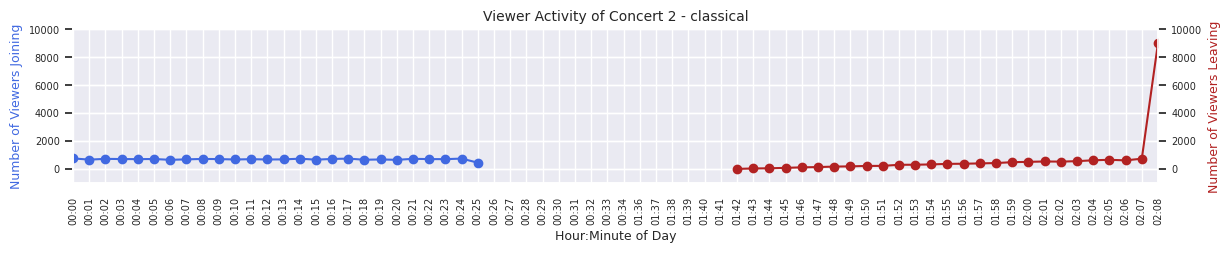

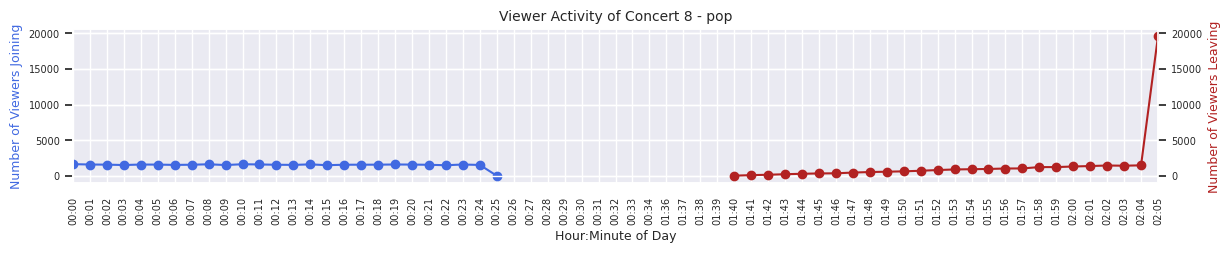

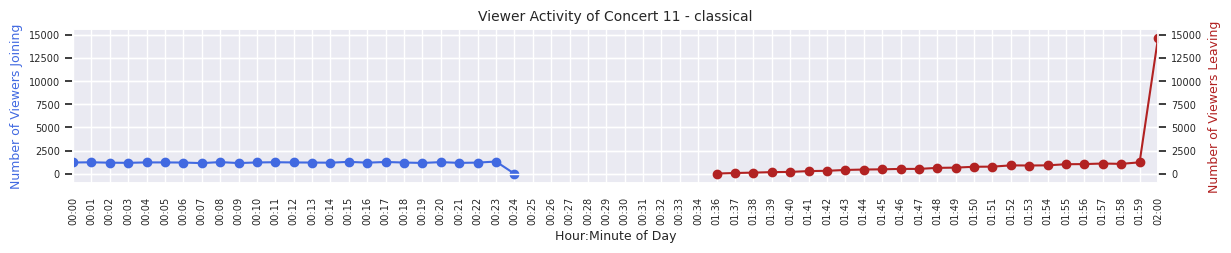

In [23]:
### plot the number of viewers joining and leaving each concert by minute, graphs are sorted by concert duration ###

def time_plots(timedf, concert_list):
    
    for i in range(min(len(concert_list), len(concert_list))):
        concertid = concert_list['concert_id'][i]
        xcol = timedf['minutes'].drop_duplicates().reset_index()
        
        
        oneconcert = timedf[timedf['concert_id']==concertid]
        concertime = xcol.merge(oneconcert, on = ['minutes'], how = 'outer').sort_values(by='minutes').reset_index()
        ids = concertime[concertime['viewer_ending_count'].notnull()].index
        last_id = ids[-1]
        concertime = concertime.loc[:last_id, :]

        xrange = sorted(concertime['minutes'].drop_duplicates())
        
        title = "Viewer Activity of Concert " + str(concertid) + " - " + str(concert_list['concert_genre'][i])
        
        # create figure and axis objects with subplots()
        fig,ax = plt.subplots(figsize=(14,2))
        
        # make a plot
        ax.plot(concertime['minutes'], concertime['viewer_starting_count'], label = "line 1", color='royalblue', marker='o')
        
        ax.set_xlabel("Hour:Minute of Day",fontsize=9)
        ax.set_xticklabels(xrange)
        ax.set_xlim(min(xrange), max(xrange))
        plt.xticks(ticks=np.arange(len(xrange)), labels=xrange, rotation = 90)
        
        ax.set_ylim(-1000,max(concertime['viewer_ending_count'].max(), concertime['viewer_starting_count'].max())+1000)
        ax.set_ylabel("Number of Viewers Joining",color="royalblue",fontsize=9)
        
        ax.set_title(title, fontsize=10)
        plt.yticks(rotation=0)
        plt.tick_params(labelsize=7)
        
        # make a plot with different y-axis using second axis object
        ax2=ax.twinx()
        ax2.plot(concertime['minutes'], concertime['viewer_ending_count'], label = "line 2", color='firebrick', marker='o')
        ax2.set_ylabel("Number of Viewers Leaving",color="firebrick",fontsize=9)
        ax2.set_ylim(-1000,max(concertime['viewer_ending_count'].max(), concertime['viewer_starting_count'].max())+1000)
        plt.yticks(rotation=0)
        plt.tick_params(labelsize=7)
        plt.show()


# create list of concert ids and genres ordered by concert duration
concert_list = concerts.reset_index().sort_values(by=['duration'], ascending=[False]).reset_index()
concert_list = concert_list[['concert_genre', 'concert_id']].drop_duplicates()

time_plots(minutes, concert_list)

**Interpretation**: The concerts follow the same pattern of viewers joining and leaving. Viewers trickle in for the first ~20% of the concert. Then there is an uninterrupted period where no users join or leave at all. About half of the viewers leave throughout the last ~20% of the show before the show is completely done, with the other half stay until the very end and leave at the last minute. Concert duration also doesn't seem to have any affect on this pattern either.
